Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the dataset

In [3]:
def load_data(file_path):
    return pd.read_csv(file_path)

# Load data
file_path = '../data/data.csv'
data = load_data(file_path)



Display an overview of the dataset (rows and columns)

In [4]:
def data_columnROW(data):
    num_rows, num_cols = data.shape
    data_types = data.dtypes

    print(f"Number of rows: {num_rows}\nNumber of columns: {num_cols}\n")
    print("Data types:")
    print(data_types)
    print("\n")

# Display overview of rows and columns
data_columnROW(data)


Number of rows: 95662
Number of columns: 16

Data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object




 Overview of the Data

In [19]:
def data_overview(data):
    print("Dataset Overview:")
    print(data.info())
    print("\n")
# Display data overview
data_overview(data)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  F

Summary Statistics

In [20]:
def summary_statistics(data):
    print("Summary Statistics:")
    print(data.describe())
    print("\n")
# Display summary statistics
summary_statistics(data)

Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000




Extract only numeric part from the columns with names combined wirh number

In [21]:
def extract_numeric_parts(data):
    data['TransactionId'] = data['TransactionId'].str.extract('(\d+)') 
    data['BatchId'] = data['BatchId'].str.extract('(\d+)') 
    data['AccountId'] = data['AccountId'].str.extract('(\d+)') 
    data['SubscriptionId'] = data['SubscriptionId'].str.extract('(\d+)') 
    data['CustomerId'] = data['CustomerId'].str.extract('(\d+)') 
    data['ProviderId'] = data['ProviderId'].str.extract('(\d+)') 
    data['ProductId'] = data['ProductId'].str.extract('(\d+)') 
    data['ChannelId'] = data['ChannelId'].str.extract('(\d+)') 

extract_numeric_parts(data)
data.head(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0


saving the updated DataFrame with the new numeric columns extracted into a CSV file named data2 

In [22]:
data.to_csv('data2.csv', index=False)


Numerical Features: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


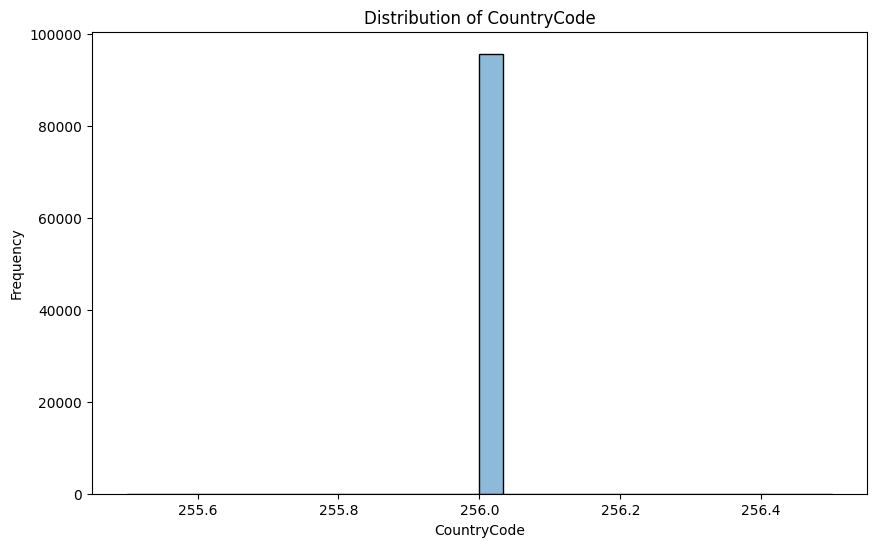

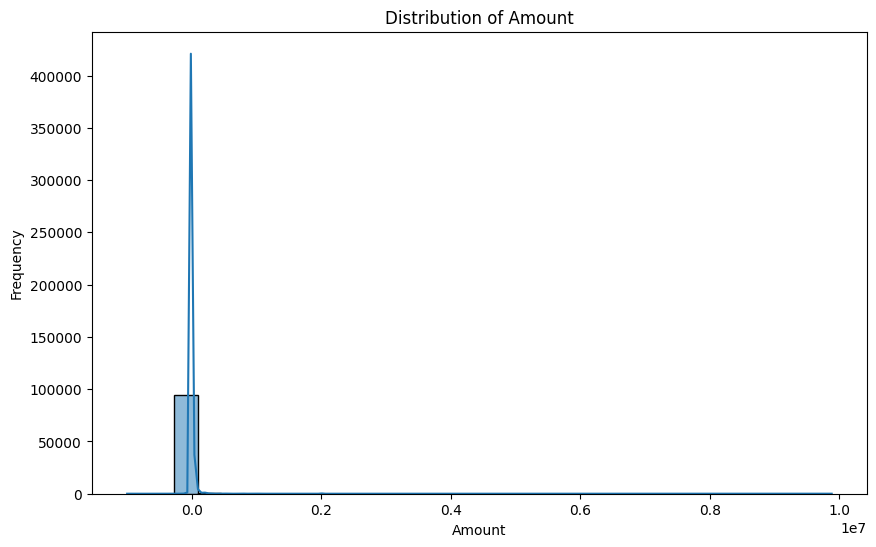

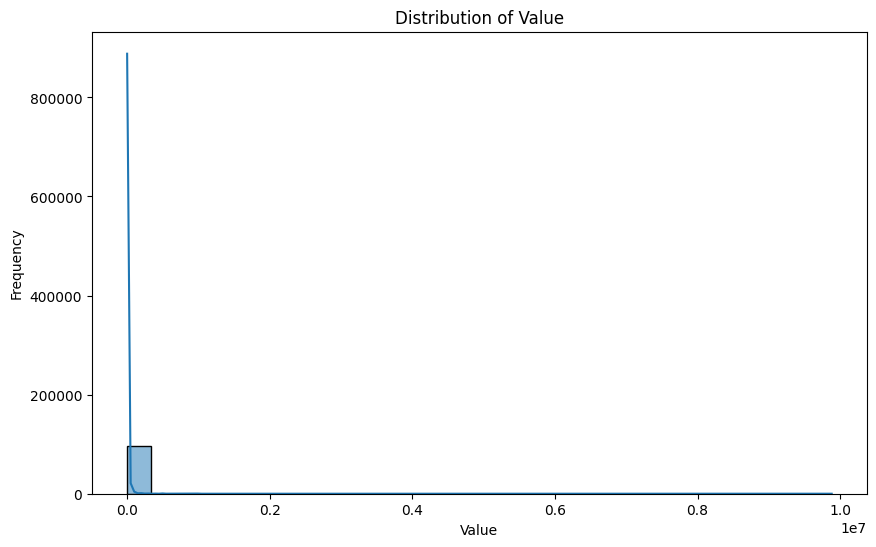

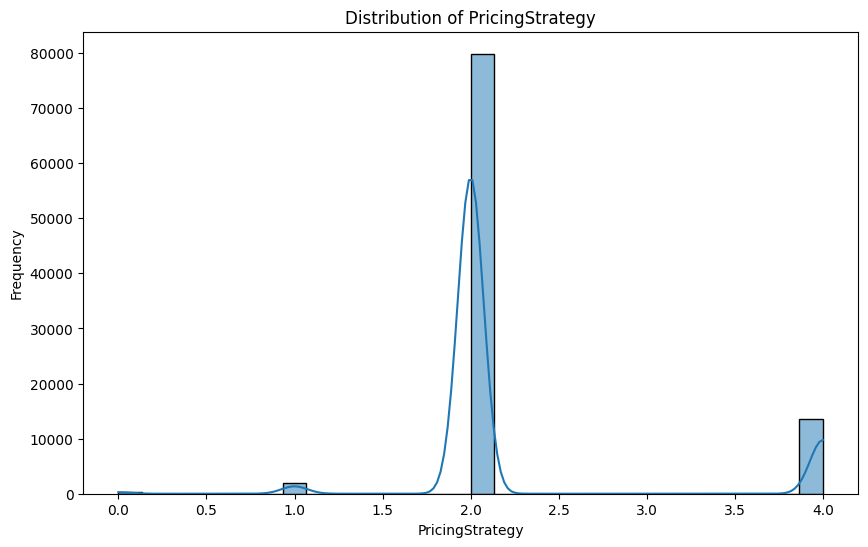

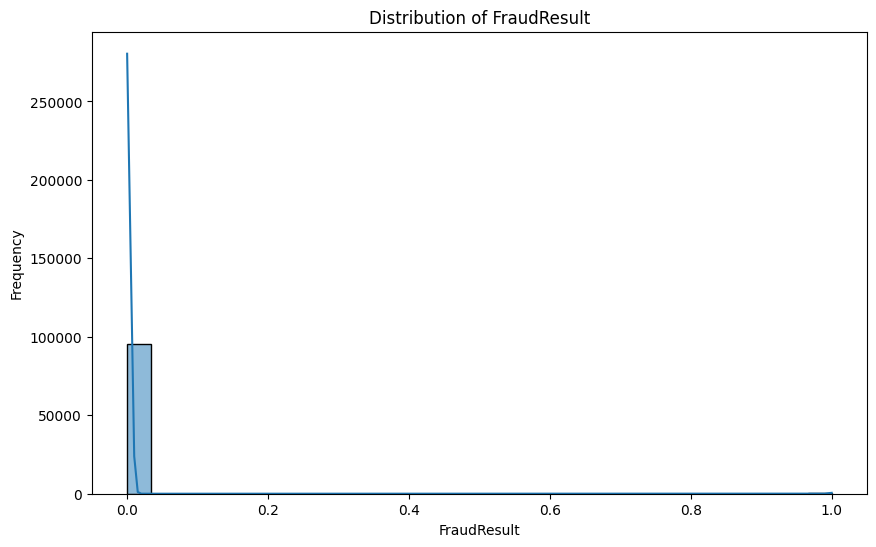

In [18]:
def plot_numerical_distribution(data):
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Numerical Features: {numerical_features}")

    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

# Plot numerical feature distribution
plot_numerical_distribution(data)


Distribution of Numerical Features

Numerical Features: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


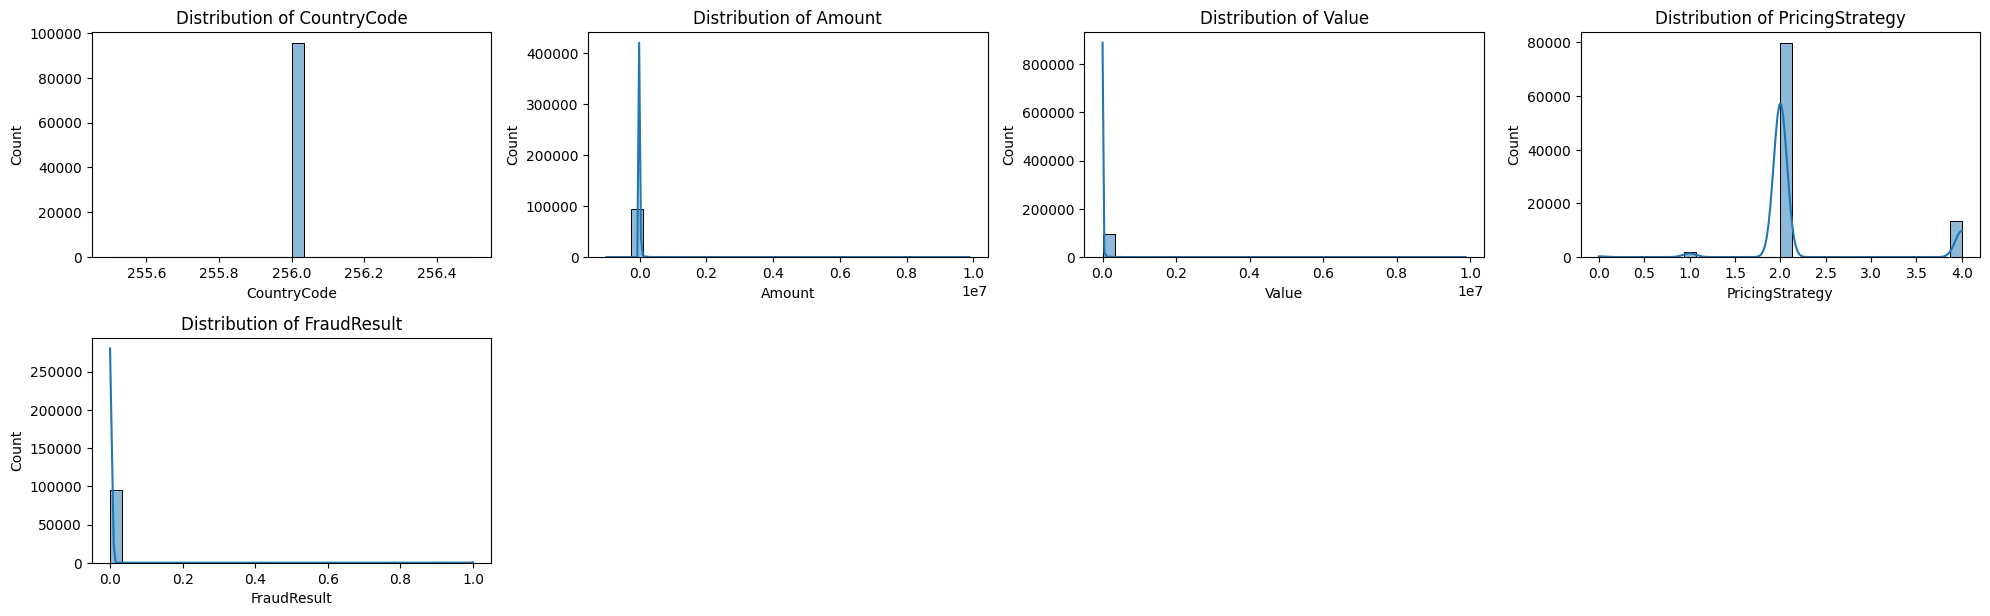

In [7]:
def plot_numerical_distribution(data):
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Numerical Features: {numerical_features}")

    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(numerical_features):
        plt.subplot(5, 4, i + 1)
        sns.histplot(data[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Plot numerical feature distribution
plot_numerical_distribution(data)

Distribution of Categorical Features

In [ ]:
def plot_categorical_distribution(data):
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical Features: {categorical_features}")

    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(categorical_features):
        plt.subplot(5, 4, i + 1)
        sns.countplot(y=data[feature], order=data[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Plot categorical feature distribution
plot_categorical_distribution(data)

Categorical Features: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


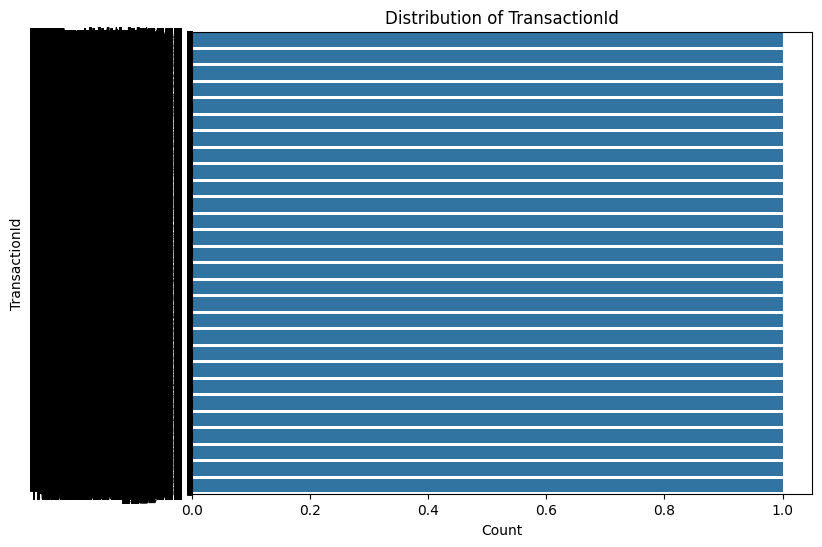

KeyboardInterrupt: 

In [15]:
def plot_categorical_distribution(data):
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical Features: {categorical_features}")

    for feature in categorical_features:
        plt.figure(figsize=(8, 6))
        sns.countplot(y=data[feature], order=data[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        plt.xlabel('Count')
        plt.ylabel(feature)
        plt.show()

# Plot categorical feature distribution
plot_categorical_distribution(data)


Correlation Analysis

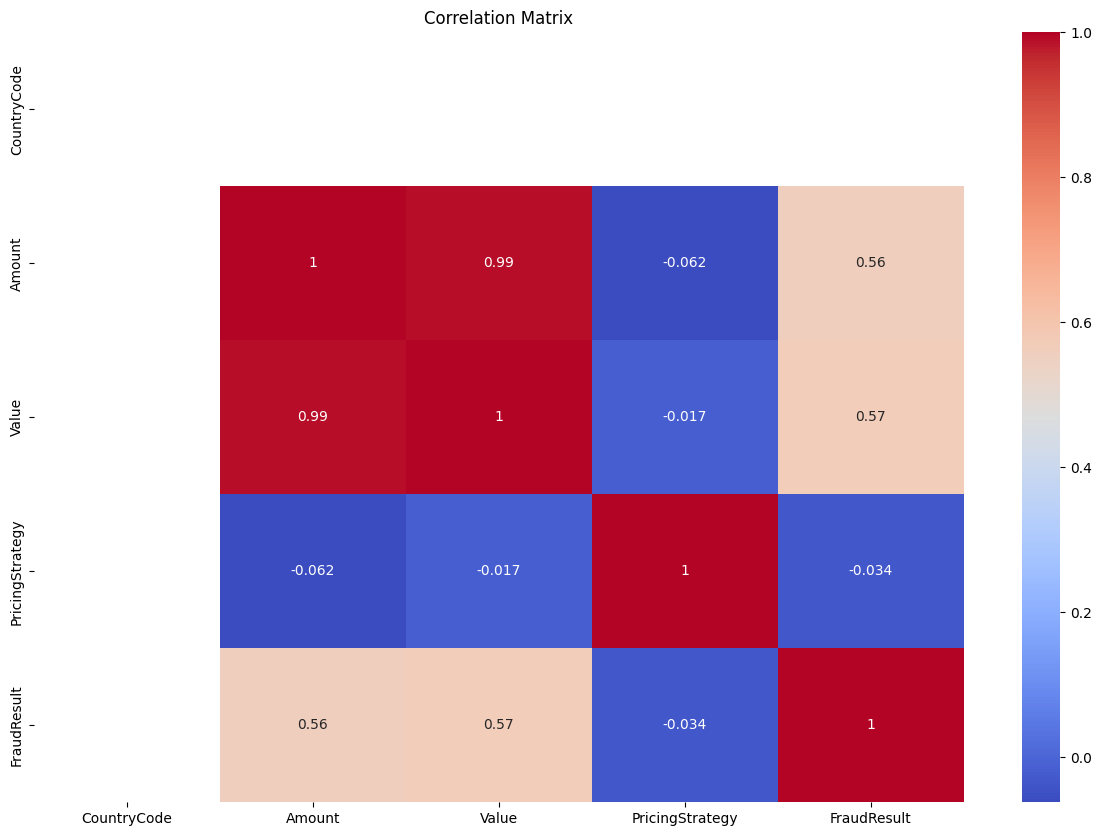

In [16]:
def correlation_analysis(data):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=np.number)
    
    # Compute correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Plot heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Perform correlation analysis
correlation_analysis(data)


Identifying Missing Values

In [9]:
def identify_missing_values(data):
    missing_values = data.isnull().sum()
    print("Missing Values:")
    print(missing_values[missing_values > 0])
    print("\n")
# Identify missing values
identify_missing_values(data)

Missing Values:
Series([], dtype: int64)




Outlier Detection

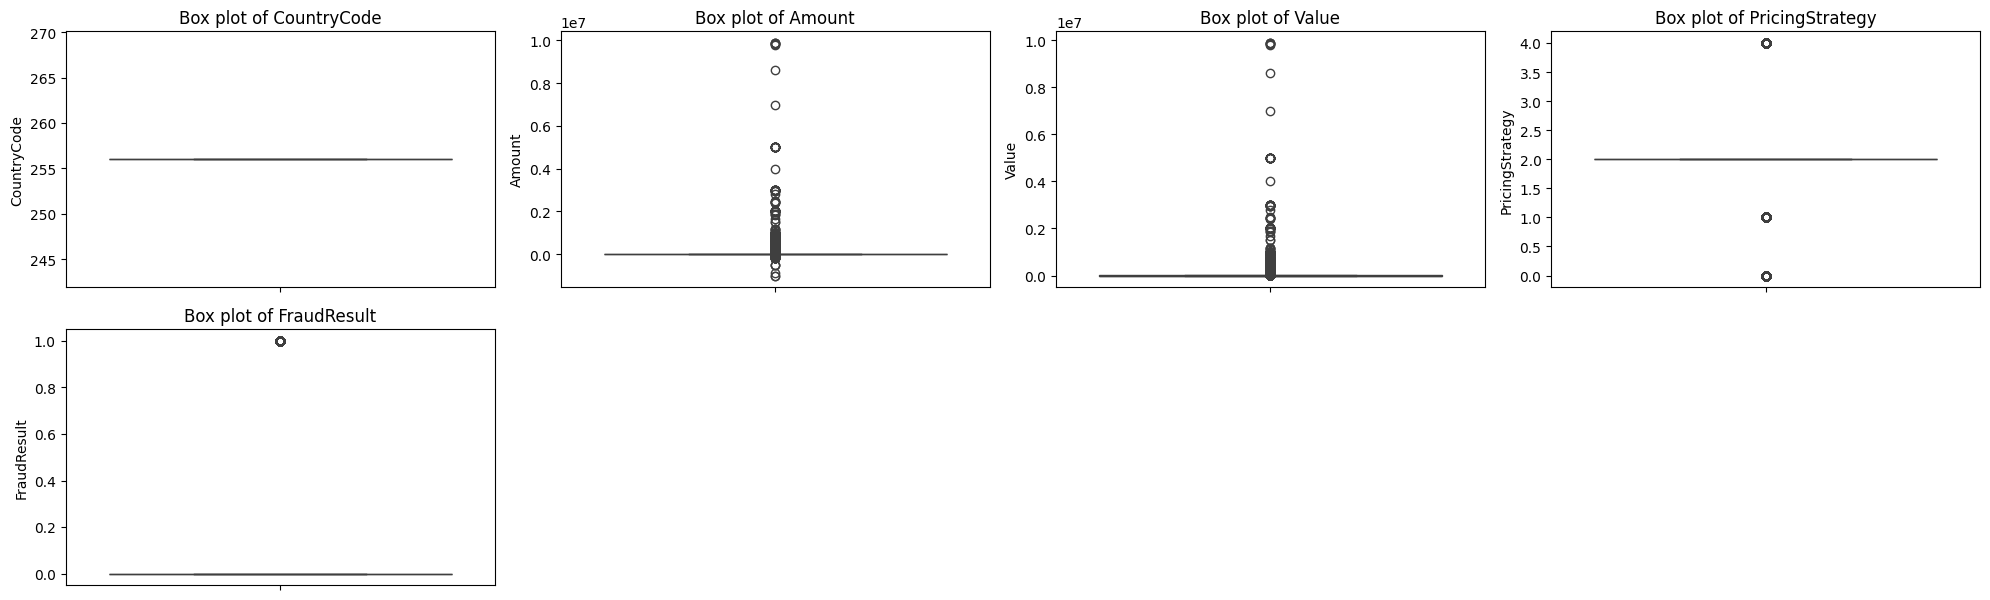

In [12]:
def detect_outliers(data):
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Numerical Features: {numerical_features}")
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(numerical_features):
        plt.subplot(5, 4, i + 1)
        sns.boxplot(data[feature])
        plt.title(f'Box plot of {feature}')
    plt.tight_layout()
    plt.show()

# Detect outliers
detect_outliers(data)


Numerical Features: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


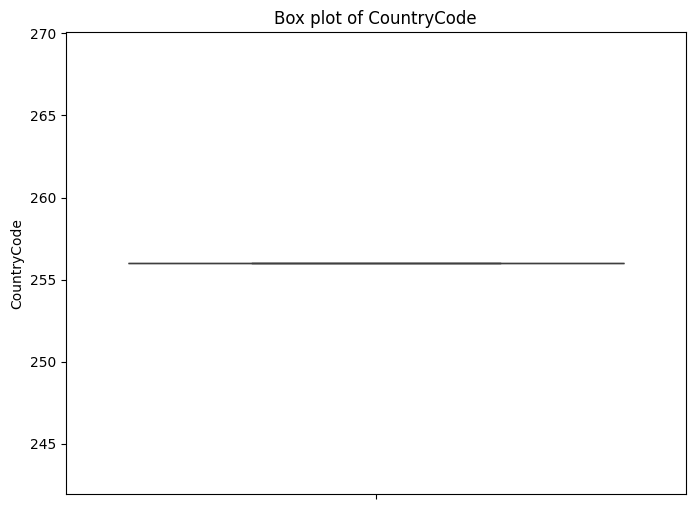

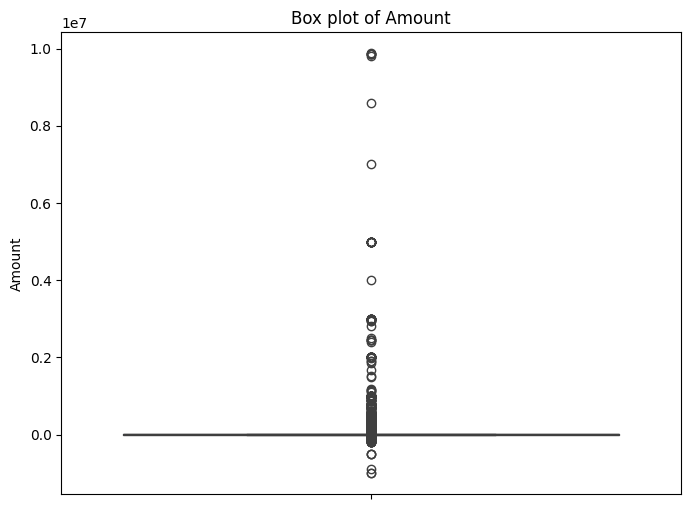

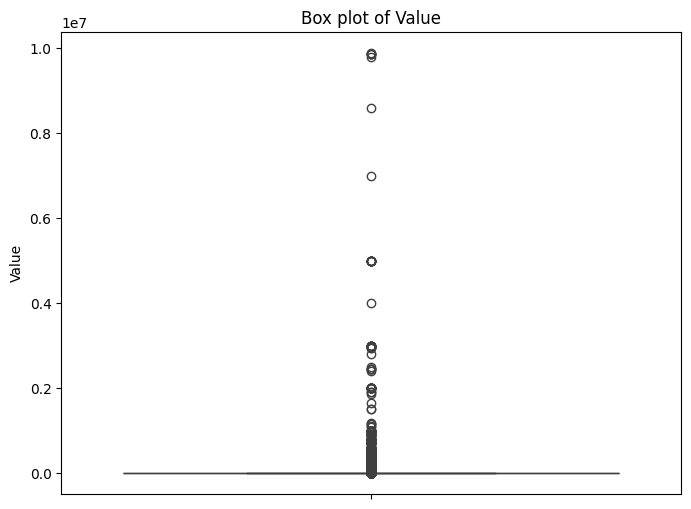

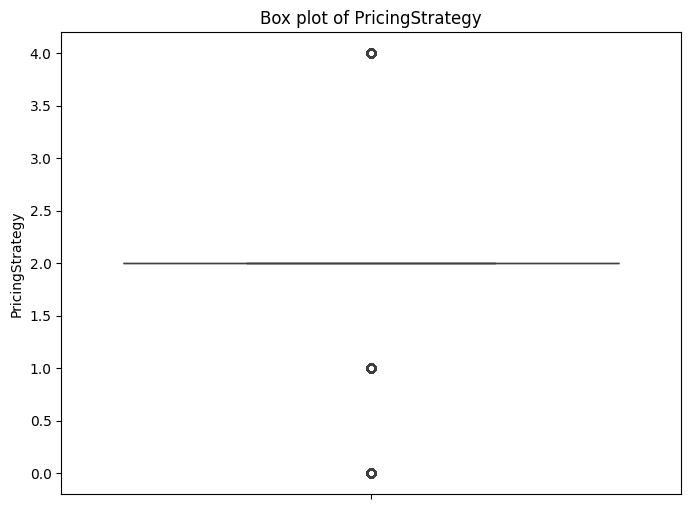

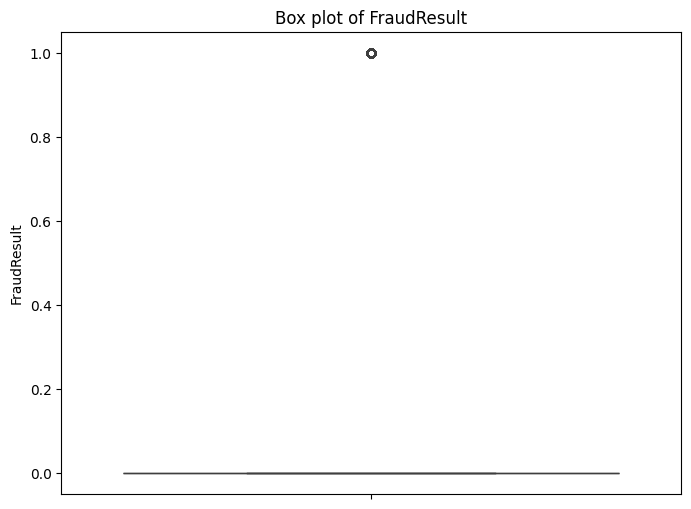

In [14]:
def detect_outliers(data):
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Numerical Features: {numerical_features}")
    
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data[feature])
        plt.title(f'Box plot of {feature}')
        plt.show()

# Detect outliers
detect_outliers(data)
